In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-train-by-the-boston-housing-prices-dataset/boston_train.csv


In [2]:
!pip install niapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.7/176.7 kB 353.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.0 MB/s eta 0:00:00


In [3]:
from niapy.problems import Problem
from niapy.algorithms.basic import ParticleSwarmOptimization

import scipy.stats as stats
from scipy.stats import randint as sp_randint

In [4]:
boston_train = pd.read_csv('/kaggle/input/boston-train-by-the-boston-housing-prices-dataset/boston_train.csv')
boston_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.40771,0.0,6.20,1,0.507,6.164,91.3,3.0480,8,307,17.4,395.24,21.46,21.7
1,19.60910,0.0,18.10,0,0.671,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
2,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,24,666,20.2,0.32,17.44,13.4
3,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
4,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31,12.1


In [5]:
boston_train.shape

(404, 14)

In [6]:
boston_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [7]:
boston_train.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [8]:
boston_train[["CHAS", "RAD", "TAX"]] = boston_train[["CHAS", "RAD", "TAX"]].astype(float)

In [9]:
boston_train.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [10]:
boston_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.423852,10.818069,11.168911,0.071782,0.556195,6.278074,68.979455,3.724405,9.551980,407.712871,18.458911,353.866139,12.768267,22.409901
std,8.197229,23.061649,6.798110,0.258447,0.116187,0.691061,27.692028,1.983793,8.741662,169.344926,2.152993,95.592190,7.170852,8.940920
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,6.300000
25%,0.082598,0.000000,5.190000,0.000000,0.453000,5.888000,45.800000,2.110500,4.000000,278.500000,17.400000,374.527500,7.135000,17.175000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.198500,77.150000,3.207450,5.000000,330.000000,19.000000,391.880000,11.675000,20.950000
75%,3.694070,3.125000,18.100000,0.000000,0.624000,6.616500,93.900000,5.104475,24.000000,666.000000,20.200000,396.285000,16.605000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Handling Outlier

<AxesSubplot:>

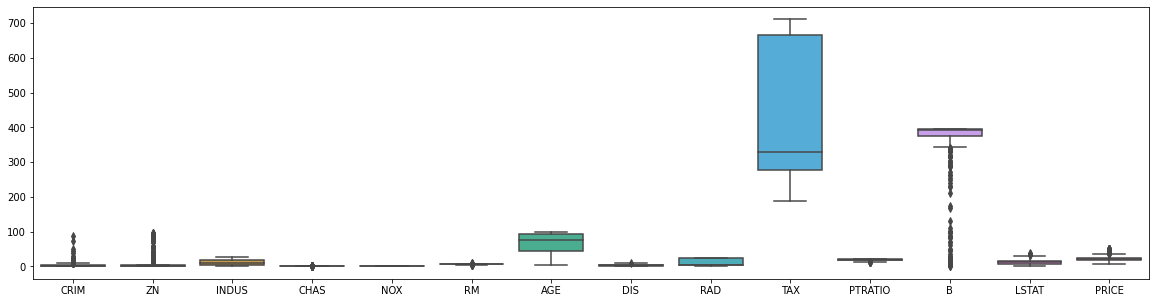

In [11]:
plt.figure(figsize=(20,5))
sns.boxplot(data=boston_train)

<AxesSubplot:>

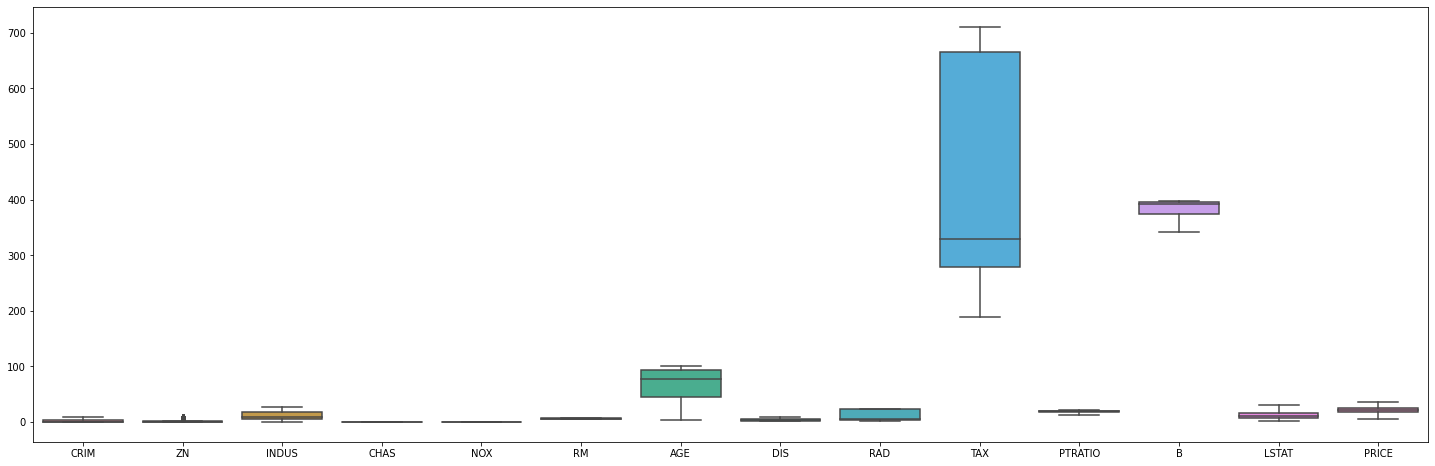

In [12]:
#remove outliers in data
for i in range(len(boston_train.columns)):
  q1 = boston_train.iloc[:, i].quantile(0.25)
  q3 = boston_train.iloc[:, i].quantile(0.75)
  iqr = q3 - q1

  lb = q1 - (iqr * 1.5)
  ub = q3 + (iqr * 1.5)
  def apply(x):
    if x > ub:
      return ub
    elif x < lb:
      return lb
    else:
      return x

  boston_train.iloc[:, i] = boston_train.iloc[:, i].apply(apply)

plt.figure(figsize=(25,8))
sns.boxplot(data=boston_train)

# Standardization

In [13]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_sc = scale.fit_transform(boston_train)
df_sc = pd.DataFrame(boston_train, columns=boston_train.columns)

# Support Vector Machine (SVM) Default Hyperparameters

In [14]:
# Check default values
svc = SVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


# Hyperparameter Tuning Using Grid Search

In [15]:
from sklearn.model_selection import GridSearchCV
class SVMHyperparameterOptimization(Problem):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Problem.__init__(self, vmin, vmax, clip)
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# SPLIT DATA

In [16]:
X = df_sc.iloc[:, 10].values.reshape(-1,1)
y = df_sc.iloc[:, 10].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Find Best Parameters

In [17]:
from sklearn import svm

# Cross validation grid search (best parameters) 
c_range = np.logspace(-0, 4, 8)
gamma_range = np.logspace(-4, 0, 8)
tuned_parameters = [{'kernel': ['rbf'],'C': c_range,'gamma':gamma_range},
                    {'kernel': ['linear'], 'C': c_range,'gamma':gamma_range}]

svr = svm.SVR()
algorithm = ParticleSwarmOptimization(population_size=10, seed=1234)
clf = GridSearchCV(svr,param_grid=tuned_parameters,verbose=20,n_jobs=-4,cv=4,
                   scoring='explained_variance')
clf.fit(X_train, y_train)

print('Best score for data:', clf.best_score_)
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Fitting 4 folds for each of 128 candidates, totalling 512 fits
[CV 1/4; 1/128] START C=1.0, gamma=0.0001, kernel=rbf...........................
[CV 1/4; 1/128] END C=1.0, gamma=0.0001, kernel=rbf;, score=0.131 total time=   0.0s
[CV 2/4; 1/128] START C=1.0, gamma=0.0001, kernel=rbf...........................
[CV 2/4; 1/128] END C=1.0, gamma=0.0001, kernel=rbf;, score=0.137 total time=   0.0s
[CV 3/4; 1/128] START C=1.0, gamma=0.0001, kernel=rbf...........................
[CV 3/4; 1/128] END C=1.0, gamma=0.0001, kernel=rbf;, score=0.136 total time=   0.0s
[CV 4/4; 1/128] START C=1.0, gamma=0.0001, kernel=rbf...........................
[CV 4/4; 1/128] END C=1.0, gamma=0.0001, kernel=rbf;, score=0.142 total time=   0.0s
[CV 1/4; 2/128] START C=1.0, gamma=0.0003727593720314938, kernel=rbf............
[CV 1/4; 2/128] END C=1.0, gamma=0.0003727593720314938, kernel=rbf;, score=0.439 total time=   0.0s
[CV 2/4; 2/128] START C=1.0, gamma=0.0003727593720314938, kernel=rbf............
[CV 2/4; 2/

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/4; 20/128] END C=13.894954943731374, gamma=0.005179474679231213, kernel=rbf;, score=0.999 total time=   0.0s
[CV 4/4; 20/128] START C=13.894954943731374, gamma=0.005179474679231213, kernel=rbf
[CV 4/4; 20/128] END C=13.894954943731374, gamma=0.005179474679231213, kernel=rbf;, score=0.999 total time=   0.0s
[CV 1/4; 21/128] START C=13.894954943731374, gamma=0.019306977288832496, kernel=rbf
[CV 1/4; 21/128] END C=13.894954943731374, gamma=0.019306977288832496, kernel=rbf;, score=0.999 total time=   0.0s
[CV 2/4; 21/128] START C=13.894954943731374, gamma=0.019306977288832496, kernel=rbf
[CV 2/4; 21/128] END C=13.894954943731374, gamma=0.019306977288832496, kernel=rbf;, score=0.999 total time=   0.0s
[CV 3/4; 21/128] START C=13.894954943731374, gamma=0.019306977288832496, kernel=rbf
[CV 3/4; 21/128] END C=13.894954943731374, gamma=0.019306977288832496, kernel=rbf;, score=0.999 total time=   0.0s
[CV 4/4; 21/128] START C=13.894954943731374, gamma=0.019306977288832496, kernel=rbf
[CV 4

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/4; 47/128] END C=719.6856730011514, gamma=0.2682695795279725, kernel=rbf;, score=0.999 total time=   0.0s
[CV 3/4; 47/128] START C=719.6856730011514, gamma=0.2682695795279725, kernel=rbf
[CV 3/4; 47/128] END C=719.6856730011514, gamma=0.2682695795279725, kernel=rbf;, score=0.999 total time=   0.0s
[CV 4/4; 47/128] START C=719.6856730011514, gamma=0.2682695795279725, kernel=rbf
[CV 4/4; 47/128] END C=719.6856730011514, gamma=0.2682695795279725, kernel=rbf;, score=0.990 total time=   0.0s
[CV 1/4; 48/128] START C=719.6856730011514, gamma=1.0, kernel=rbf...............
[CV 1/4; 48/128] END C=719.6856730011514, gamma=1.0, kernel=rbf;, score=0.998 total time=   0.0s
[CV 2/4; 48/128] START C=719.6856730011514, gamma=1.0, kernel=rbf...............
[CV 2/4; 48/128] END C=719.6856730011514, gamma=1.0, kernel=rbf;, score=0.999 total time=   0.0s
[CV 3/4; 48/128] START C=719.6856730011514, gamma=1.0, kernel=rbf...............
[CV 3/4; 48/128] END C=719.6856730011514, gamma=1.0, kernel=rbf;,

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/4; 77/128] END C=3.72759372031494, gamma=0.019306977288832496, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/4; 77/128] START C=3.72759372031494, gamma=0.019306977288832496, kernel=linear
[CV 4/4; 77/128] END C=3.72759372031494, gamma=0.019306977288832496, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/4; 78/128] START C=3.72759372031494, gamma=0.07196856730011514, kernel=linear
[CV 1/4; 78/128] END C=3.72759372031494, gamma=0.07196856730011514, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/4; 78/128] START C=3.72759372031494, gamma=0.07196856730011514, kernel=linear
[CV 2/4; 78/128] END C=3.72759372031494, gamma=0.07196856730011514, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/4; 78/128] START C=3.72759372031494, gamma=0.07196856730011514, kernel=linear
[CV 3/4; 78/128] END C=3.72759372031494, gamma=0.07196856730011514, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/4; 78/128] START C=3.72759372031494, gamma=0.07196856730011514, kernel=linear
[C

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/4; 115/128] END C=2682.6957952797247, gamma=0.0013894954943731374, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/4; 115/128] START C=2682.6957952797247, gamma=0.0013894954943731374, kernel=linear
[CV 2/4; 115/128] END C=2682.6957952797247, gamma=0.0013894954943731374, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/4; 115/128] START C=2682.6957952797247, gamma=0.0013894954943731374, kernel=linear
[CV 3/4; 115/128] END C=2682.6957952797247, gamma=0.0013894954943731374, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/4; 115/128] START C=2682.6957952797247, gamma=0.0013894954943731374, kernel=linear
[CV 4/4; 115/128] END C=2682.6957952797247, gamma=0.0013894954943731374, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/4; 116/128] START C=2682.6957952797247, gamma=0.005179474679231213, kernel=linear
[CV 1/4; 116/128] END C=2682.6957952797247, gamma=0.005179474679231213, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/4; 116/128] START C=2682.6957952797247, 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

****Best score for data: 0.9997958964958598****

****Best C: 51.7947467923121****

****Best Kernel: rbf****

****Best Gamma: 0.0013894954943731374****

# Eksperimen
We are gonna try to using different parameters on the model that we've build

In [18]:
# Cross validation grid search (Using differences parameters) 
degree_range = np.logspace(3,8)
epsilon_range = np.logspace(0.01,0.1,1)
tuned_parameters = [{'degree' : degree_range,'epsilon':epsilon_range }, 
                    {'degree' : degree_range,'epsilon':epsilon_range}] 

svr = svm.SVR()
clf = GridSearchCV(svr,param_grid=tuned_parameters,verbose=20,n_jobs=-4,cv=4,
                   scoring='explained_variance')
clf.fit(X_train, y_train)

print('Best score for data:', clf.best_score_)

print('Best degree:',clf.best_estimator_.degree) 

Fitting 4 folds for each of 100 candidates, totalling 400 fits
[CV 1/4; 1/100] START degree=1000.0, epsilon=1.023292992280754..................
[CV 1/4; 1/100] END degree=1000.0, epsilon=1.023292992280754;, score=0.898 total time=   0.0s
[CV 2/4; 1/100] START degree=1000.0, epsilon=1.023292992280754..................
[CV 2/4; 1/100] END degree=1000.0, epsilon=1.023292992280754;, score=0.913 total time=   0.0s
[CV 3/4; 1/100] START degree=1000.0, epsilon=1.023292992280754..................
[CV 3/4; 1/100] END degree=1000.0, epsilon=1.023292992280754;, score=0.902 total time=   0.0s
[CV 4/4; 1/100] START degree=1000.0, epsilon=1.023292992280754..................
[CV 4/4; 1/100] END degree=1000.0, epsilon=1.023292992280754;, score=0.928 total time=   0.0s
[CV 1/4; 2/100] START degree=1264.8552168552958, epsilon=1.023292992280754......
[CV 1/4; 2/100] END degree=1264.8552168552958, epsilon=1.023292992280754;, score=0.898 total time=   0.0s
[CV 2/4; 2/100] START degree=1264.8552168552958, e

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/4; 3/100] END degree=1599.8587196060573, epsilon=1.023292992280754;, score=0.928 total time=   0.0s
[CV 1/4; 4/100] START degree=2023.5896477251576, epsilon=1.023292992280754......
[CV 1/4; 4/100] END degree=2023.5896477251576, epsilon=1.023292992280754;, score=0.898 total time=   0.0s
[CV 2/4; 4/100] START degree=2023.5896477251576, epsilon=1.023292992280754......
[CV 2/4; 4/100] END degree=2023.5896477251576, epsilon=1.023292992280754;, score=0.913 total time=   0.0s
[CV 3/4; 4/100] START degree=2023.5896477251576, epsilon=1.023292992280754......
[CV 3/4; 4/100] END degree=2023.5896477251576, epsilon=1.023292992280754;, score=0.902 total time=   0.0s
[CV 4/4; 4/100] START degree=2023.5896477251576, epsilon=1.023292992280754......
[CV 4/4; 4/100] END degree=2023.5896477251576, epsilon=1.023292992280754;, score=0.928 total time=   0.0s
[CV 1/4; 5/100] START degree=2559.547922699536, epsilon=1.023292992280754.......
[CV 1/4; 5/100] END degree=2559.547922699536, epsilon=1.023292992

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/4; 33/100] END degree=1842069.9693267164, epsilon=1.023292992280754;, score=0.913 total time=   0.0s
[CV 3/4; 33/100] START degree=1842069.9693267164, epsilon=1.023292992280754.....
[CV 3/4; 33/100] END degree=1842069.9693267164, epsilon=1.023292992280754;, score=0.902 total time=   0.0s
[CV 4/4; 33/100] START degree=1842069.9693267164, epsilon=1.023292992280754.....
[CV 4/4; 33/100] END degree=1842069.9693267164, epsilon=1.023292992280754;, score=0.928 total time=   0.0s
[CV 1/4; 34/100] START degree=2329951.810515372, epsilon=1.023292992280754......
[CV 1/4; 34/100] END degree=2329951.810515372, epsilon=1.023292992280754;, score=0.898 total time=   0.0s
[CV 2/4; 34/100] START degree=2329951.810515372, epsilon=1.023292992280754......
[CV 2/4; 34/100] END degree=2329951.810515372, epsilon=1.023292992280754;, score=0.913 total time=   0.0s
[CV 3/4; 34/100] START degree=2329951.810515372, epsilon=1.023292992280754......
[CV 3/4; 34/100] END degree=2329951.810515372, epsilon=1.02329

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/4; 35/100] END degree=2947051.7025518096, epsilon=1.023292992280754;, score=0.913 total time=   0.0s
[CV 3/4; 35/100] START degree=2947051.7025518096, epsilon=1.023292992280754.....
[CV 3/4; 35/100] END degree=2947051.7025518096, epsilon=1.023292992280754;, score=0.902 total time=   0.0s
[CV 4/4; 35/100] START degree=2947051.7025518096, epsilon=1.023292992280754.....
[CV 4/4; 35/100] END degree=2947051.7025518096, epsilon=1.023292992280754;, score=0.928 total time=   0.0s
[CV 1/4; 36/100] START degree=3727593.720314938, epsilon=1.023292992280754......
[CV 1/4; 36/100] END degree=3727593.720314938, epsilon=1.023292992280754;, score=0.898 total time=   0.0s
[CV 2/4; 36/100] START degree=3727593.720314938, epsilon=1.023292992280754......
[CV 2/4; 36/100] END degree=3727593.720314938, epsilon=1.023292992280754;, score=0.913 total time=   0.0s
[CV 3/4; 36/100] START degree=3727593.720314938, epsilon=1.023292992280754......
[CV 3/4; 36/100] END degree=3727593.720314938, epsilon=1.02329

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/4; 65/100] END degree=26826.957952797275, epsilon=1.023292992280754;, score=0.928 total time=   0.0s
[CV 1/4; 66/100] START degree=33932.217718953296, epsilon=1.023292992280754.....
[CV 1/4; 66/100] END degree=33932.217718953296, epsilon=1.023292992280754;, score=0.898 total time=   0.0s
[CV 2/4; 66/100] START degree=33932.217718953296, epsilon=1.023292992280754.....
[CV 2/4; 66/100] END degree=33932.217718953296, epsilon=1.023292992280754;, score=0.913 total time=   0.0s
[CV 3/4; 66/100] START degree=33932.217718953296, epsilon=1.023292992280754.....
[CV 3/4; 66/100] END degree=33932.217718953296, epsilon=1.023292992280754;, score=0.902 total time=   0.0s
[CV 4/4; 66/100] START degree=33932.217718953296, epsilon=1.023292992280754.....
[CV 4/4; 66/100] END degree=33932.217718953296, epsilon=1.023292992280754;, score=0.928 total time=   0.0s
[CV 1/4; 67/100] START degree=42919.34260128778, epsilon=1.023292992280754......
[CV 1/4; 67/100] END degree=42919.34260128778, epsilon=1.023

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/4; 67/100] END degree=42919.34260128778, epsilon=1.023292992280754;, score=0.928 total time=   0.0s
[CV 1/4; 68/100] START degree=54286.754393238596, epsilon=1.023292992280754.....
[CV 1/4; 68/100] END degree=54286.754393238596, epsilon=1.023292992280754;, score=0.898 total time=   0.0s
[CV 2/4; 68/100] START degree=54286.754393238596, epsilon=1.023292992280754.....
[CV 2/4; 68/100] END degree=54286.754393238596, epsilon=1.023292992280754;, score=0.913 total time=   0.0s
[CV 3/4; 68/100] START degree=54286.754393238596, epsilon=1.023292992280754.....
[CV 3/4; 68/100] END degree=54286.754393238596, epsilon=1.023292992280754;, score=0.902 total time=   0.0s
[CV 4/4; 68/100] START degree=54286.754393238596, epsilon=1.023292992280754.....
[CV 4/4; 68/100] END degree=54286.754393238596, epsilon=1.023292992280754;, score=0.928 total time=   0.0s
[CV 1/4; 69/100] START degree=68664.88450042998, epsilon=1.023292992280754......
[CV 1/4; 69/100] END degree=68664.88450042998, epsilon=1.0232

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/4; 98/100] END degree=62505519.25273976, epsilon=1.023292992280754;, score=0.898 total time=   0.0s
[CV 2/4; 98/100] START degree=62505519.25273976, epsilon=1.023292992280754......
[CV 2/4; 98/100] END degree=62505519.25273976, epsilon=1.023292992280754;, score=0.913 total time=   0.0s
[CV 3/4; 98/100] START degree=62505519.25273976, epsilon=1.023292992280754......
[CV 3/4; 98/100] END degree=62505519.25273976, epsilon=1.023292992280754;, score=0.902 total time=   0.0s
[CV 4/4; 98/100] START degree=62505519.25273976, epsilon=1.023292992280754......
[CV 4/4; 98/100] END degree=62505519.25273976, epsilon=1.023292992280754;, score=0.928 total time=   0.0s
[CV 1/4; 99/100] START degree=79060432.10907702, epsilon=1.023292992280754......
[CV 1/4; 99/100] END degree=79060432.10907702, epsilon=1.023292992280754;, score=0.898 total time=   0.0s
[CV 2/4; 99/100] START degree=79060432.10907702, epsilon=1.023292992280754......
[CV 2/4; 99/100] END degree=79060432.10907702, epsilon=1.02329299

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

****Best score for data: 0.9103788105862172****

****Best degree: 1000.0****

**Best epsilon: 1.023292992280754**

# Evaluation
using the RandomSeach optimization method. 

In [19]:
from sklearn.model_selection import RandomizedSearchCV
class SVRHyperparameterOptimization(Problem):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Problem.__init__(self, vmin, vmax, clip)
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [20]:
#SVM
import scipy.stats as stats
from scipy.stats import randint as sp_randint
rf_params = {
    'C': stats.uniform(0,100),
    "kernel":['poly','rbf','sigmoid'],
    "epsilon":stats.uniform(0,1)
}
n_iter_search=20
clf = SVR(gamma='scale')
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='neg_mean_squared_error')
Random.fit(X, y)
print(Random.best_params_)
print("Best score for data:"+ str(-Random.best_score_))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 20.539274648490913, 'epsilon': 0.03374448768473759, 'kernel': 'rbf'}
Best score for data:0.0022717668968185722


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


****'C': 92.40522542724364****

****'epsilon': 0.17827648454495526**** 

****'kernel': 'rbf'****

****Best score for data:0.020110259666669454****